Calculate the beam waist $(w_{0})$: The focused beam waist is determined by the input beam diameter $(D)$, the focal length of the lens $(f)$, and the laser wavelength $(\lambda)$.
$$w_0=\frac{2f\lambda}{\pi D}$$

Rayleigh length $(z_{R})$: The Rayleigh length is then calculated using the beam waist, the beam quality factor $(M^{2})$ and wavelength.
$$(z_{R})=\frac{\pi w_0^2}{M^2\lambda}$$

Beam waist:
The diameter of the Airy disc (defined as the distance between the first minima in the diffraction pattern) is what is generally meant by ‘spot size’ in microscopy.
$$Airy\,disc:\quad2w_0=1.22\frac{\lambda}{NA}$$
other spot sizes:
$$FWHM:\quad2w_0=0.51\frac{\lambda}{NA}$$
$$1/e:\quad2w_0=0.82\frac{\lambda}{NA}$$

In [2]:
import sys
sys.path.append("..")
from functions import n_squared
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science'])

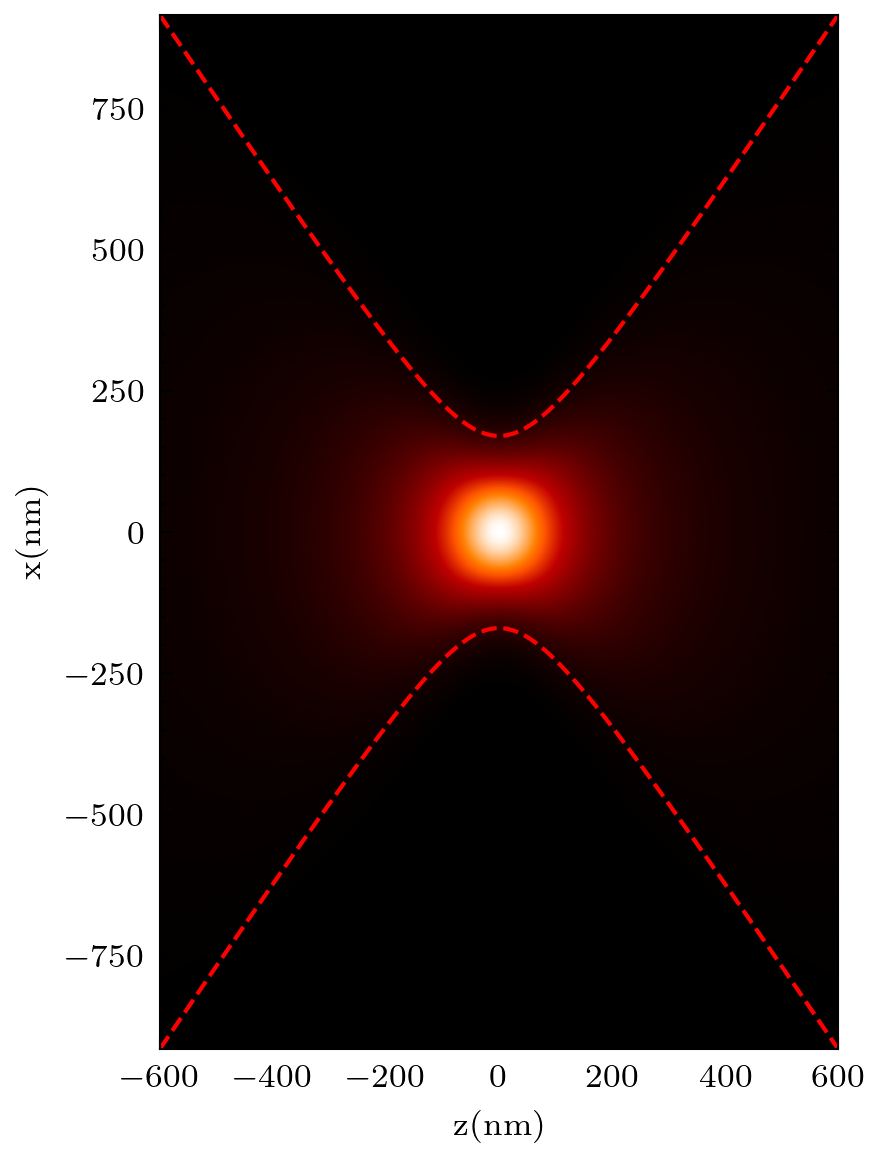

In [3]:
z = np.linspace(-6e2,6e2,1000)
NA = 1.2
wl = 800
w0 = 0.51*(wl/NA)/2 # FWHM method
zR = np.pi*w0**2/wl
wz = w0*np.sqrt(1+(z/zR)**2)
x = np.linspace(np.min(-wz),np.max(wz),1000)
y=0
Z,X = np.meshgrid(z,x)
def gaussian_intensity(x, y, z, w0, zR):
    wz = w0 * np.sqrt(1 + (z / zR)**2)  # Beam radius at position y
    intensity = (w0 / wz)**2 * np.exp(-2 * (x**2 + y**2) / wz**2)
    return intensity
plt.rcParams.update({'font.size': 8})
plt.figure(figsize=(7,4),dpi=300)
y_position = 0.0  # Position along the propagation axis (e.g., at the beam waist)
intensity_profile = gaussian_intensity(X, y_position, Z, w0, zR)
#['binary', 'gist_yarg', 'gist_gray', 'gray', 'bone','pink', 'spring', 'summer', 'autumn', 'winter', 'cool','Wistia', 'hot', 'afmhot', 'gist_heat', 'copper'])
plt.imshow(intensity_profile, extent=[z.min(), z.max(), x.min(), x.max()],cmap='gist_heat', origin='lower', aspect='equal')

#beam waist
#plt.arrow(0,1.5*w0,0,-0.5*w0+0.00001,head_width=0.002, head_length=0.00001, fc='white', ec='white',width=0.0001)
#plt.arrow(0,-1.5*w0,0,0.5*w0-0.00001,head_width=0.002, head_length=0.00001, fc='white', ec='white',width=0.0001)
#plt.text(0, w0, f'$2w_0={2*w0:.0f}nm$',color='white',va='bottom',ha='right',rotation=90)
#Raighly range
#plt.arrow(1.5*zR,0,-0.5*zR+0.002,0,head_width=0.00001, head_length=0.002, fc='white', ec='white',width=0.000001)
#plt.arrow(-1.5*zR,0,0.5*zR-0.002,0,head_width=0.00001, head_length=0.002, fc='white', ec='white',width=0.000001)
#plt.text(zR,0, f'$2z_R={2*zR:.0f}nm$',color='white',va='bottom',ha='left',rotation=0)

#volume
vol = (4/3)*np.pi*zR*w0*w0
#plt.text(0,-3*w0, f'$V={vol:.0f}nm^3$',color='white',va='bottom',ha='center',rotation=0)

#No.of attoms
a = 3e-10
lat_vol = a**3
N_b = vol*1e-27/lat_vol/1e6
#plt.text(0,-3.5*w0, f'$N={N_b:.0f}\\,million$',color='white',va='bottom',ha='center',rotation=0)

plt.plot(z,wz,'--r')
plt.plot(z,-wz,'--r')
plt.xlabel('z(nm)')
plt.ylabel('x(nm)')
plt.tight_layout()
plt.show()
#plt.gca().set_aspect('equal')